# Composite Systems

The state space of a composite system is given by the tensor product of the state space of the constituents. 

We previously described electron spins as an example. An electron with spin up is represented by the state vector

\begin{align}
\newcommand{\ket}[1]{\left|{#1}\right\rangle}
\newcommand{\bra}[1]{\left\langle{#1}\right|}
\end{align}

\begin{align}
\ket{0} = \begin{pmatrix} 1 \\ 0 \end{pmatrix}
\end{align}

What about a 2-electron system? The state vector representing both electrons in spin up state is given by 

\begin{align}
\ket{0,0} = \begin{pmatrix} 1 \\ 0 \end{pmatrix} \otimes \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0 \end{pmatrix}
\end{align}

Consequently, the state space for a 2-electron spin system is the set of the 4 state vectors corresponding to the different combinations of spin states. 

\begin{align}
\mathcal{H} = \{\ket{0,0}, \ket{0,1}, \ket{1,0}, \ket{1,1}\}
\end{align}

# Quantum Walker

In a classical 1-D random walk on a line, the mathematical properties of the "coin" system and the position system are completely independent. In the quantum analogue, this is not the case. 

In our quantum system, we can model the "coin" system after electron spin. This is a logical analogy, since like a coin flip, a single electron's spin has only 2 allowed values with equal probability. In our model, an electron with spin up represents the "heads" state and moves our walker right. The reverse is true for an electron with spin down. 

The coin system's system space is given by:

\begin{align}
\mathcal{H}_c = \{\ket{0}, \ket{1}\}
\end{align}

The position of the walker is a second system. Its position now cannot be described by a single integer, but rather by a state vector. 

The position space is given by the set of position state vectors

\begin{align}
\mathcal{H}_p = \{ \ket{n}: n \in \mathbb{Z} \}
\end{align}

where each state vector n is populated with zeros except for the entry corresponding to position n, which is one. As a simple example, if we apply 2 time steps to a quantum walker starting at 0, the allowed positions span from -2 to +2. The walker at position +2 is represented by the state vector

\begin{align}
|2> = \begin{pmatrix} 0 \\ 0 \\ 0 \\ 0 \\ 1 \end{pmatrix}
\end{align}

Now that we have our subsystems defined, we can construct the composite system space. As above, this is constructed from the tensor product of our coin space and our position space. 

\begin{align}
\mathcal{H}_{system} = \mathcal{H}_c \otimes \mathcal{H}_p
\end{align}



Analogous to how we constructed the system space, the system wavefunction can also be constructed from the tensor product of our starting position and the starting value of the coin. For simplicity, we will start the walker at position 0, the coin in the "heads" state, and limit ourselves to 1 time step. In this case, our starting wavefunction is 

\begin{align}
\ket{\psi(0)} = \ket{0} \otimes \ket{0} = 
\begin{pmatrix} 1 \\ 0 \end{pmatrix} \otimes \begin{pmatrix} 0 \\ 1 \\ 0 \end{pmatrix} = 
\begin{pmatrix} 0 \\ 0 \\ 1 \\ 0 \\ 0 \\ 0 \end{pmatrix}
\end{align}


# Unitary Evolution

So far, we've successfully set up our quantum system's initial conditions. However, we're really interested in the system's time evolution. We'll be looking at the discrete-time case. 

In the classic random walk case, a time step is taken by flipping the coin, and moving the walker back or forward 1 step according to the result. 

In the quantum case, we'll apply a similar algorithm. We'll "flip" the quantum coin using a coin operator, then apply a shift operator to the composite coin+position state. Thus, to define our system's evolution we need to find a sensible **coin operator** and a **shift operator**. 

## Coin operator

While we can initialize our quantum coin to a "heads" or "tails" state, it doesn't make sense to use the corresponding state vector as the coin operator. Rather, we want an operator that maps either allowed coin state vector to an equally-weighted superposition of states, in order to approximate an unbiased classical coin. The Hadamard operator is a logical choice here. 


\begin{align}
H = \frac{1}{\sqrt{2}}\begin{pmatrix} 1&&1 \\ 1&&-1 \end{pmatrix}
\end{align}

To illustrate the point, let's apply this operator to the first basis vector, [1,0]. 

\begin{align}
\frac{1}{\sqrt{2}}\begin{pmatrix} 1&&1 \\ 1&&-1 \end{pmatrix}\begin{pmatrix} 1 \\ 0 \end{pmatrix} \\
= \frac{1}{\sqrt{2}} \begin{pmatrix} (1*1) + (0*1) \\ (1*1) + (0*-1) \end{pmatrix} \\
= \frac{1}{\sqrt{2}} \begin{pmatrix} 1 \\ 1 \end{pmatrix} \\
= \frac{1}{\sqrt{2}}\begin{pmatrix} 1 \\ 0 \end{pmatrix} + \frac{1}{\sqrt{2}}\begin{pmatrix} 0 \\ 1 \end{pmatrix}
\end{align}

This result is a linear superposition of the coin in either basis, with equal weights. Applying the Hadamard operator to our other basis vector [0,1] yields 

\begin{align}
\frac{1}{\sqrt{2}}\begin{pmatrix} 1&&1 \\ 1&&-1 \end{pmatrix}\begin{pmatrix} 0 \\ 1 \end{pmatrix} \\
= \frac{1}{\sqrt{2}} \begin{pmatrix} 1 \\ -1 \end{pmatrix} \\
= \frac{1}{\sqrt{2}}\begin{pmatrix} 1 \\ 0 \end{pmatrix} - \frac{1}{\sqrt{2}}\begin{pmatrix} 0 \\ 1 \end{pmatrix}
\end{align}

The sign is now negative, but otherwise equivalent to the first result. The negative sign does not have any effect on the state probabilities, so we call this coin non-biased.

## Shift operator

This shift operator must satisfy the following properties:

\begin{align}
S\ket{0}\ket{n} = \ket{0}\ket{n+1} \\
S\ket{1}\ket{n} = \ket{1}\ket{n-1}
\end{align}

In other words, applying the shift operator to a combined coin+position state should result in a positional shift, while maintaining the same coin state. The full shift operator is given by:

\begin{align}
S = \ket{0}\bra{0}\otimes\sum\limits_{n}\ket{n+1}\bra{n} + \ket{1}\bra{1}\otimes\sum\limits_{n}\ket{n-1}\bra{n}
\end{align}

You are encouraged to verify the algebra yourself if desired!

## Unitary operator

Our algorithm, in each time step, applies the coin operator then the shift operator. Given this description, we can define a unitary operator U as:

\begin{align}
U = S(H\otimes I)
\end{align}

where I is the identity matrix with the same dimensions as our positional Hilbert space. 

This unitary operator describes the time evolution of our quantum system. The system at time t+1 can be described by an application of this U to the system wavefunction at time t. 

\begin{align}
\ket{\psi(t)} = U^{t}\ket{\psi(0)}
\end{align}

Phew, that's most of the math out of the way. All important operators are defined, what's left is taking time steps and examining the behavior. If you're still here, let's check out some code!

# Random Walking

We'll first define our classical random walker. 

In [91]:
import numpy as np
from scipy.linalg import expm
import math
import matplotlib.pyplot as plt
import time

class random_walker:
    
    def __init__(self):
        """
        Initializes the walker, with a given position and equal H/T probability.
        """
        self.position = 0
        self.p = 0.5
        self.t = 0
        
    def take_time_step(self):
        """
        Let the random walker take another time step
        """
        if np.random.uniform() < self.p:
            self.position -= 1
        else:
            self.position += 1
        self.t += 1
        
    @staticmethod
    def probs(t,n):
        """ 
        Return the probability of the walker being at position n given t time steps.
        This is given from summing Bernoulli distributions. 
        """
        if ((t+n) % 2 == 1) or (n > t):
            return(0)
        else:
            output = 1/(2**t) * (np.math.factorial(t) / \
                                 (np.math.factorial((t-n)/2) * np.math.factorial((t+n)/2)))
            return(output)
    
    @staticmethod
    def evaluate_probs(t):
        """ Given the number of timesteps, plot the cumulative probability distribution"""
        dist = np.zeros(2*t + 1)
        for n in range(-t, t + 1):
            dist[n+t] = random_walker.probs(t, n)
        return(dist)
        
    def reset_walker(self):
        """ 
        Resets the walker to its initial conditions, position 0 and time 0
        """
        self.position = 0
        self.t = 0

After a single time step, the probability distribution looks as follows: 

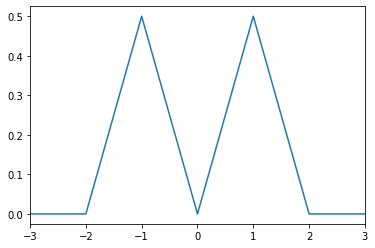

In [14]:
# initialize random walker
rw = random_walker()

# Get the allowed values
n_steps = 1
allowed_probs = np.array([0,0] + list(rw.evaluate_probs(n_steps)) + [0,0])
plt.plot(range(-3,4), allowed_probs)
plt.xlim(-3, 3)
plt.show()

This is an extremely intuitive result. After 1 step, we see that the classical walker has 50% probability of ending at position 1 and 50% probability of ending at position -1. 

What about after a large number of time steps? The probability of our walker being found at position n given t time steps is: 

\begin{align}
P(x = n | t) = \frac{1}{2^{n}} * \frac{t!}{(\frac{n+t}{2})!(\frac{n-t}{2})!}
\end{align}

This result can obtained from basic combinatorics. Let's run some simulations to confirm this distribution. 

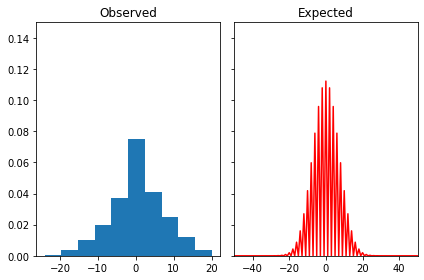

In [107]:
final_position = [] # keep track of number of final positions
n_steps = 50 # total timesteps to take
n_sims = 1000 # total number of simulations

for _ in range(n_sims): # run 1000 simulations
    rw.reset_walker() # reset the position/time between simulations
    
    for _ in range(n_steps):
        rw.take_time_step() # take 1 step
    
    final_position.append(rw.position) # store final position after n steps, 1 walker

# Visualize results
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True)
ax[0].hist(final_position, bins=n_steps//5, density=True, stacked=True)
ax[0].set_title("Observed")
ax[1].plot(range(-n_steps, n_steps+1), rw.evaluate_probs(rw.t), color='red')
ax[1].set_title("Expected")
plt.xlim(-50, 50)
plt.ylim(0, .15)
fig.tight_layout()

Our simulations roughly mirror the expected distribution. The walker most commonly ends up near the starting position, and can be found to the left or right with roughly equal probability. 

# Quantum Walking

So far, we've demonstrated how a random walker behaves. We've discussed at length how to set up the quantum analogue, so let's see how it actually behaves. 

# Taking a time step

With all our operators defined, we can look at the process of taking a time step. A time step is a single application of the unitary operator U. Given the initial starting conditions we set above, let's evaluate the time step. 

Remember that U is simply an application of the coin operator followed by the shift operator. We'll look at the first step, applying the coin operator to our initial conditions. 

\begin{align}
(H \otimes I) \ket{0}\ket{0} \\
= \frac{\ket{0} + \ket{1}}{\sqrt{2}} \ket{0}
\end{align}

This result is obtainable if we remember that the Hadamard operator applied to a coin state returns a superposition of the head+tails results with equal probability. The next step is applying the shift operator. 

\begin{align}
S \frac{\ket{0} + \ket{1}}{\sqrt{2}} \ket{0} \\
= \frac{1}{\sqrt{2}}(S\ket{0}\ket{0} + S\ket{1}\ket{0}) \\
= \frac{1}{\sqrt{2}}(\ket{0}\ket{1} + \ket{1}\ket{-1})
\end{align}

We see that the result of applying the unitary operator once is a superposition of the walker in positions +-1 with equal probability. This is exactly what we get in the case of our classic random walk. 

In [95]:
class quantum_walker:
    
    def __init__(self, num_steps, initial_coin, initial_pos):
        self.n = num_steps # number of steps to take
        self.p = 2*num_steps + 1 # number of possible positions
        
        # Define operators
        # coin operator
        self.coin = np.array([[1,0], [0,1]])
        # shift operator
        self.shift = np.kron(np.roll(np.eye(self.p), 1, axis=0), np.outer(self.coin[0], self.coin[0])) + \
                             np.kron(np.roll(np.eye(self.p), -1, axis=0), np.outer(self.coin[1], self.coin[1]))
        self.h = (1/math.sqrt(2))*np.array([[1,1], [1,-1]]) # hadamard operator
        self.u = self.shift.dot(np.kron(np.eye(self.p), self.h)) # unitary operator 
        
        # Set initial coin state and position state
        self.coin_init = initial_coin
        self.pos = initial_pos
        self.t = 0 # Start at time t=0
        
        # Ground composite state
        self.state = np.kron(self.pos, self.coin_init)
        
    def take_time_step(self):
        """
        One application of our unitary operator
        """ 
        self.state = self.u.dot(self.state)
        self.t += 1
        
    def evaluate_probs(self):
        """
        Return the squared amplitude of each eigenvector, to get the probabilities
        """
        return(np.array([x*np.conj(x) for x in self.state])) # Take squared amplitude
    
    def reset_walker(self):
        """
        Reset our walker to initial conditions
        """
        self.state = np.kron(self.pos, self.coin_init)

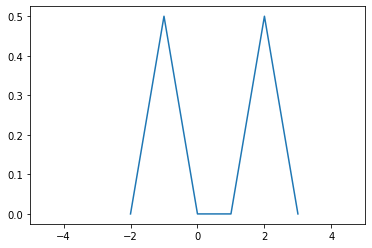

In [109]:
# Define starting conditions. n=num time steps, p=total allowed positional space, 
# c0 = starting coin state, pos0 = starting position
n=1
c0 = np.array([1,0])
pos0 = np.zeros(2*n+1)
pos0[n] = 1
qw = quantum_walker(n, c0, pos0)

# Take 1 time step, and plot probabilities
qw.take_time_step()
plt.plot(range(-2*n, 2*(n+1)), qw.evaluate_probs())
plt.xlim(-5, 5)
plt.show()

The geometry of the entangled wavefunction means a 1:1 recovery of the positional state alone is not possible - it evolves in tandem with the coin state. But nevertheless we can see that after 1 time step, we have equal probability of the walker being in either state +1 or -1, as we saw mathematically after applying our shift operator. So far, we are exactly mirroring the classical random walker. 

In fact, if we measure the position of the quantum walker at each time step, we will obtain exactly the same behavior as the random walker. This is due to the quantum mechanical property of wave function collapse - observation or measurement collapses the superposition of states achieved from a time step. Measuring where the walker is essentially "resets" our system, where the new initial position is the measured position. From this point, applying the unitary operator again will result in the same result: a superposition of the walker one step forward or one step backwards. 

However, we're interested in how to obtain results that differ from a classical walk. We can achieve this by _not_ measuring in between time steps. This way, we can preserve the state superposition at each time step and allow this superposition to evolve over time. 

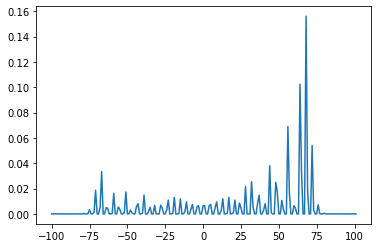

In [42]:
# Define starting conditions. n=num time steps, p=total allowed positional space, 
# c0 = starting coin state, pos0 = starting position
n=50
c0 = np.array([1,0])
pos0 = np.zeros(2*n+1)
pos0[n] = 1
qw = quantum_walker(n, c0, pos0)

# Start steppin'
for _ in range(n):
    qw.take_time_step()
plt.plot(range(-2*n, 2*(n+1)), qw.evaluate_probs())
plt.show()

This is a major deviation from our classical random coin. Instead of seeing a distribution centered at 0, with symmetrical falloff to the left and right, we see that our quantum walker moves to the right with much higher probability than to the left. How can we explain this? 

The answer is due to the asymmetry of our initial conditions. Remember, we chose a "heads" coin as the starting position, where "heads" moves our walker to the right. As a result, the destructive interference in our quantum wavefunction cancels more terms involving the coin in "down" state. Let's motivate this by expanding on the algebra we did above. 

Remember, after one time step our quantum wavefunction is:

\begin{align}
\ket{\psi(1)} = \frac{1}{\sqrt{2}}(\ket{0}\ket{1} + \ket{1}\ket{-1})
\end{align}

If we apply our algorithm again (coin operator then shift operator) we obtain:

\begin{align}
\ket{\psi(2)} = \frac{1}{2}(-\ket{1}\ket{-2} + (\ket{0} + \ket{1})\ket{0} + \ket{0}\ket{2})
\end{align}

This result is still equivalent to the classical case. If we evaulate our probabilities here, the walker has a 50% chance of ending up at position 0 and 25% chance of ending at position +- 1. However, let's look at one more time step. To keep things from getting too verbose, I'll only consider the two middle terms from our current wavefunction, and drop the normalization constant. 

\begin{align}
\ket{\psi(2)}' = \ket{0}\ket{0} + \ket{1}\ket{0}
\end{align}

Applying the Hadamard coin:

\begin{align}
H\ket{\psi(2)}' = (\ket{0} + \ket{1})\ket{0} + (\ket{0}-\ket{1})\ket{0}
\end{align}

Applying the shift operator:

\begin{align}
S(H\ket{\psi(2)}') = \ket{0}\ket{1} + \ket{1}\ket{-1} + \ket{0}\ket{1} - \ket{1}\ket{-1}
\end{align}

In this last time step, we see that the two states with the walker in position -1 actually cancel. In quantum lingo, this is known as "destructive interference". Conversely, the probability of the walker ending in position +1 is boosted, in a phenomenon known as "constructive interference". This concept of interference is novel in quantum mechanics, and explains the asymmetrical behavior of our quantum walker. 

We can obtain a symmetrical walk by choosing a symmetrical starting coin instead, that represents a superposition of both the heads and tail states.

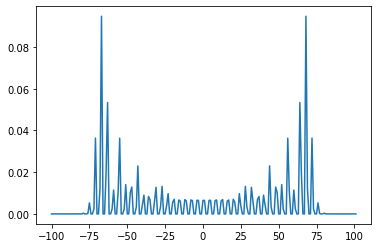

In [45]:
csymm = np.array([1, -1j]) / math.sqrt(2) # Symmetric starting coin
symmetric_qw = quantum_walker(n, csymm, pos0) # Using same initial position and space as before
for _ in range(n):
    symmetric_qw.take_time_step()
plt.plot(range(-2*n, 2*(n+1)), symmetric_qw.evaluate_probs())
plt.show()

While the behavior still doesn't mirror our random walk, in that it's actually _less_ likely the walker ends up at the origin compared to the outer extremes, it's now a symmetrical walk. 

### Quantum Graph Traversal

One of the most powerful applications of quantum walks is the ability for a walk to speed up graph traversal. Generally speaking, classical algorithms will require exponential time to reach a given node in a graph with sufficient time, whereas a quantum algorithm can solve the same problem in polynomial time. How does this work?

Let's look at an example. Our line is essentially a one-dimensional graph, and each integer position can be described as a node. How many time steps will our random walker and our quantum walker require respectively to achieve > 5% probability of being found at a given node? Let's use position +15 as an example. 

In [113]:
# Random walker

rw.reset_walker()
t = 0
p = 0
while p < .01:
    rw.take_time_step()
    t += 1
    p = rw.probs(t, 15)
print(f"{t} time steps required classically")

47 time steps required classically


In [114]:
# Quantum walker

p = 0
t = 0
while p < .01:
    t += 1
    pos0 = np.zeros(2*t + 1)
    pos0[t] = 1
    qw = quantum_walker(t, csymm, pos0)
    for _ in range(t):
        qw.take_time_step()
    try:
        p = qw.evaluate_probs()[t+30] # Double the index offset since every other index = position
    except IndexError:
        pass
print(f"{t} time steps required in quantum space")

14 time steps required in quantum space


We set an arbitrary cutoff probability of 1% to determine our "hitting time", or the time an algorithm requires to reach a particular node. We see that our classical hitting time is 47 steps, whereas our quantum hitting time is 14 steps. 

This can be inferred from the plots shown above too - the probability of reaching "far" nodes is much higher in the quantum case than in the classical case. 

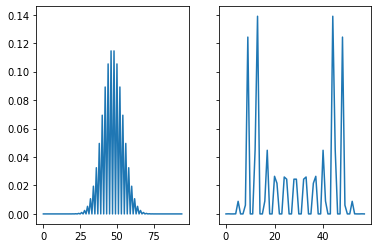

In [85]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True)

ax[0].plot(rw.evaluate_probs(rw.t))
ax[1].plot(qw.evaluate_probs())
plt.show()

## Continuous Quantum Walks

So far, we've been discussing _discrete-time_ walks. We have a defined time interval, at which a step occurs. What if we replace discrete time steps for a continuous time distribution? 

### Classical Continuous Markov Chain

We'll model this a little differently. Instead of a coin, we need a transition matrix M instead. Each $M_{ij}(t)$ entry of this matrix refers to the probability the walker transitions from vertex j to vertex i in a time interval t. 

We need to define 3 more parameters to begin this analysis: 
- $\gamma$: the transition rate. We assume this is constant over time and at every node in our graph. 
- $\varepsilon$: an infinitessimal time interval
- $d_{j}$: the degree of vertex j, or how many nodes vertex j connects to. Since we are discussing a one dimensional line, d is 2 for all nodes in our graph.

We can see that the probability of a transition from node j in any interval $\varepsilon$ is $d_{j}\gamma\varepsilon$. 

The first step in finding our transition matrix M is defining a generating matrix H. 

\begin{align}
H =
\begin{cases}
d_{j}\gamma & \text{if i=j} \\
-\gamma & \text{if i != j and adjacent} \\
0 & \text{if i != j and non-adjacent}
\end{cases}
\end{align}

While the proof is a little outside of the scope of this presentation, our generating matrix helps set up the following differential equation:

\begin{align}
\frac{dM_{ij}(t)}{dt} = -\sum_{k} H_{kj}M_{ik}(t)
\end{align}

Solving the differential equation returns the time dependent transition matrix:

\begin{align}
M(t) = e^{Ht}
\end{align}

The state of the walker at any time t now depends on the initial conditions and $M(t)$. 

### Quantum Continuous Markov Chain

Since we no longer have a quantum coin, all we need to do is convert the transition matrix to an equivalent unitary operator. The easiest way to do this is by replacing $H$ with $iH$, such that 

\begin{align}
U(t) = e^{-iHt}
\end{align}

Then we can apply this new unitary operator to our initial position-only wavefunction. 

In [127]:
### continuous qw

gamma = 0.8
t = 100
n=100
p = 2*n + 1
H = np.zeros([p,p])

for i in range(p):
    
    for j in range(p):
        
        if i==j:
            H[i,j] = 2*gamma
        elif abs(i-j) == 1:
            H[i,j] = -gamma
            
u = expm(-1j * t * H)

psi0 = np.zeros(p)
psi0[n] = 1
psit = np.dot(u, psi0)
prob = [x * np.conj(x) for x in psit]

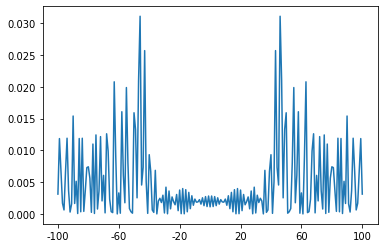

In [128]:
fig = plt.figure()
ax = fig.add_subplot(111)

plt.plot(np.arange(p), prob)
loc = range(0, p, p//5) #Location of ticks
plt.xticks(loc)
ax.set_xticklabels(range (-n, n+1, p // 5))
plt.show()

Comparing to the discrete-time symmetrical quantum walk, we see that the continuous time walk also displays some bimodality away from the origin. However, while the discrete time walk can be parametrized by choosing different initial conditions, the continuous time walk can be parametrized with an additional $\gamma$ factor that controls disperson about the origin. 